Project Dollar value

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Read Data and preprocessing

In [2]:


# Load parquet files
#df = pd.read_parquet('C:/Users/Admin/Downloads/analytics_3714b913_68f5_44eb_8cfc_a3e6955f3ab8.mvt_combo_line.parquet')
df = pd.read_parquet('analytics_ebaca63c_96a9_490a_a7da_e1eb6f7f3f0c.mvt_combo_line.parquet')
#df = pd.read_parquet('analytics_f3dc8773_d687_47b9_887d_6442c32d155c.mvt_combo_line.parquet')
#df = pd.read_parquet('analytics_fb5f05dd_74c6_41b7_bd8c_16bd1459d40b.mvt_combo_line.parquet')

In [3]:
df.columns

Index(['base_quantity', 'base_unit_cost', 'base_unit_price',
       'customer_account_status', 'customer_class', 'customer_id',
       'customer_name', 'customer_number', 'customer_sales_person_code',
       'customer_sales_person', 'discount', 'discount_amount', 'doc_date',
       'doc_external_id', 'doc_shipto_code', 'doc_shipto_display_name',
       'document_class', 'document_id', 'extended_cost', 'extended_price',
       'external_number', 'item_category_code', 'item_class',
       'item_description', 'item_number', 'item_type', 'item_vendor_item_no',
       'item_vendor_no', 'line_description', 'line_external_id', 'line_id',
       'line_markdown_amount', 'line_shipto_code', 'line_shipto_display_name',
       'line_warehouse_id', 'line_warehouse', 'markdown_percent',
       'price_level_id', 'quantity', 'sales_rep_id', 'sales_rep_name',
       'sales_territory_id', 'sales_territory', 'subtotal',
       'subtotal_net_discount', 'unit_cost', 'unit_price', 'uofm',
       'warehouse_

In [4]:
df.shape

(2155662, 50)

In [5]:
df['date'] = pd.to_datetime(df['doc_date'], unit='s')

In [6]:
df['date'].head()

0   2021-09-15
1   2021-09-15
2   2020-06-29
3   2019-09-09
4   2022-06-20
Name: date, dtype: datetime64[ns]

In [7]:
# Extract year and month from 'converted_date'
df['year_month'] = df['date'].dt.to_period('M')

In [8]:
df['year_month'].head()

0    2021-09
1    2021-09
2    2020-06
3    2019-09
4    2022-06
Name: year_month, dtype: period[M]

In [9]:
# Assuming 'df' has 'year_month', 'document_id', 'base_quantity', and 'subtotal' columns

# Group by 'year_month' and aggregate the unique count of 'document_id', sum of 'base_quantity', and sum of 'subtotal'
aggregated_df = df.groupby('year_month').agg({
    'document_id': pd.Series.nunique,  # Unique count of document IDs (invoices)
    'quantity': 'sum',            # Sum of base quantity
    'subtotal': 'sum'                  # Sum of subtotal
}).reset_index()

# Renaming the columns for clarity
aggregated_df.columns = ['Year-Month', 'Total Invoice', 'Quantity', 'Total Dollar Value']

# Display the first few rows of the aggregated DataFrame
print(aggregated_df.head())

  Year-Month  Total Invoice    Quantity Total Dollar Value
0    2018-07              5     9.00000             514.85
1    2018-08             47    66.00000            5024.30
2    2018-09             45    48.00000            3348.46
3    2018-10            270  1466.00000          166108.24
4    2018-11           2895  5655.00000          369790.93


In [10]:
aggregated_df.dtypes

Year-Month            period[M]
Total Invoice             int64
Quantity                 object
Total Dollar Value       object
dtype: object

In [11]:
# Convert 'Year-Month' from Period to datetime
aggregated_df['Year-Month'] = aggregated_df['Year-Month'].dt.to_timestamp()

Data Exploration

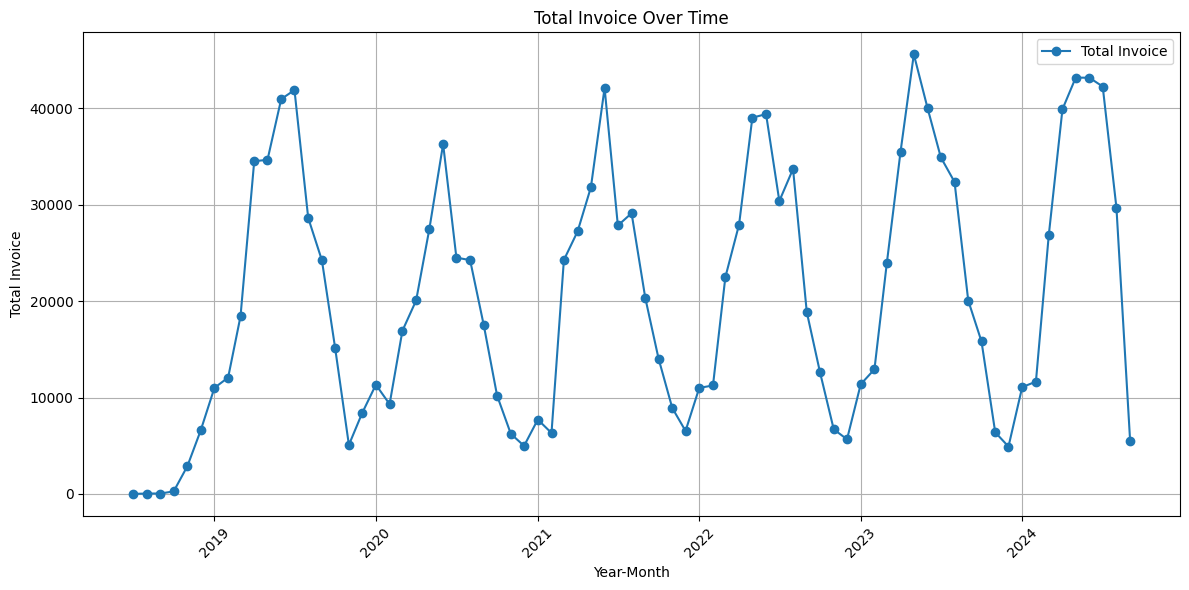

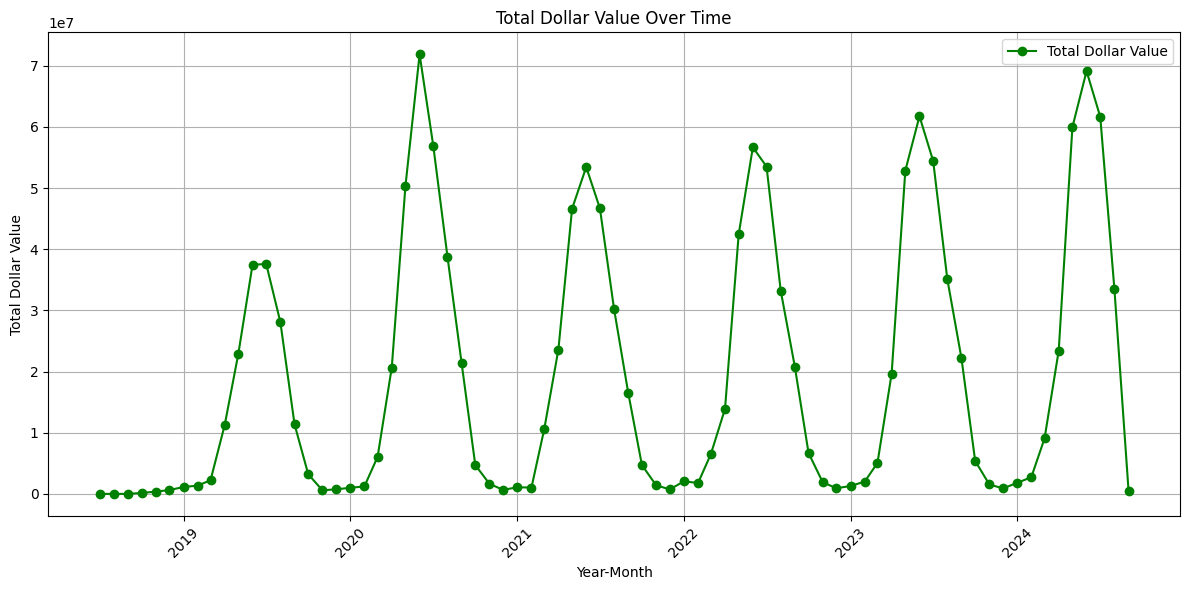

In [12]:
import matplotlib.pyplot as plt



# Ensure 'Total Invoice' and 'Total Dollar Value' are numeric
aggregated_df['Total Invoice'] = pd.to_numeric(aggregated_df['Total Invoice'], errors='coerce')
aggregated_df['Total Dollar Value'] = pd.to_numeric(aggregated_df['Total Dollar Value'], errors='coerce')

# Plotting the time series for 'Total Invoice'
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['Year-Month'], aggregated_df['Total Invoice'], marker='o', label='Total Invoice')
plt.title('Total Invoice Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Invoice')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the time series for 'Total Dollar Value'
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['Year-Month'], aggregated_df['Total Dollar Value'], marker='o', color='green', label='Total Dollar Value')
plt.title('Total Dollar Value Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Dollar Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


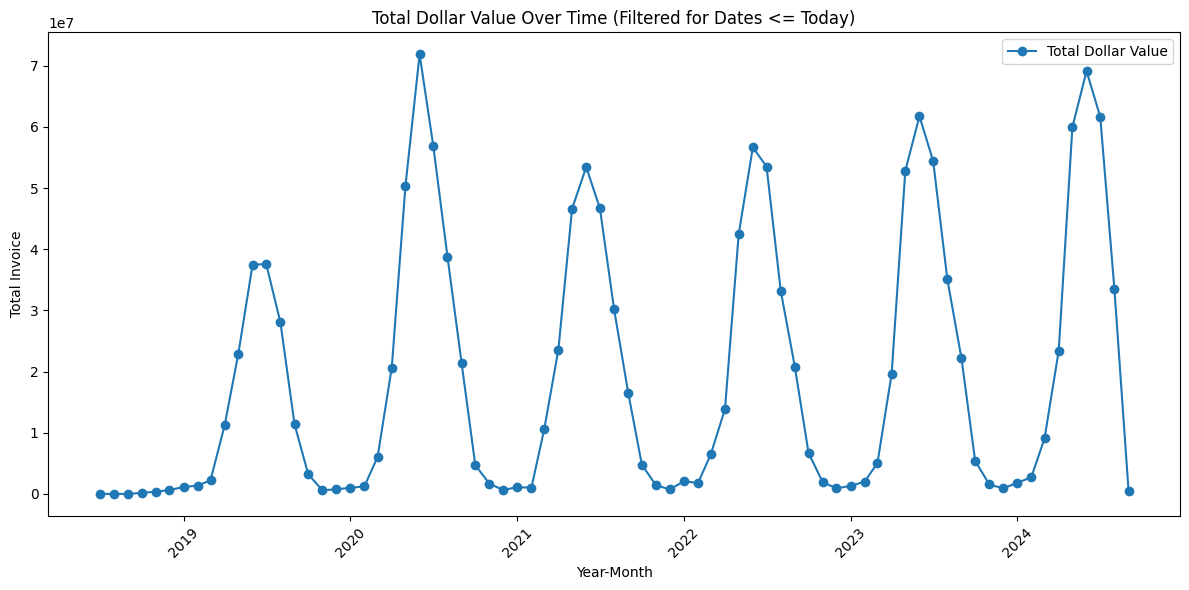

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter rows where 'Year-Month' is less than or equal to today's date
cleaned_df = aggregated_df[aggregated_df['Year-Month'] <= pd.Timestamp.today()]

# Plot the cleaned data
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df['Year-Month'], cleaned_df['Total Dollar Value'], marker='o', label='Total Dollar Value')
plt.title('Total Dollar Value Over Time (Filtered for Dates <= Today)')
plt.xlabel('Year-Month')
plt.ylabel('Total Invoice')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<module 'matplotlib.pyplot' from 'c:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

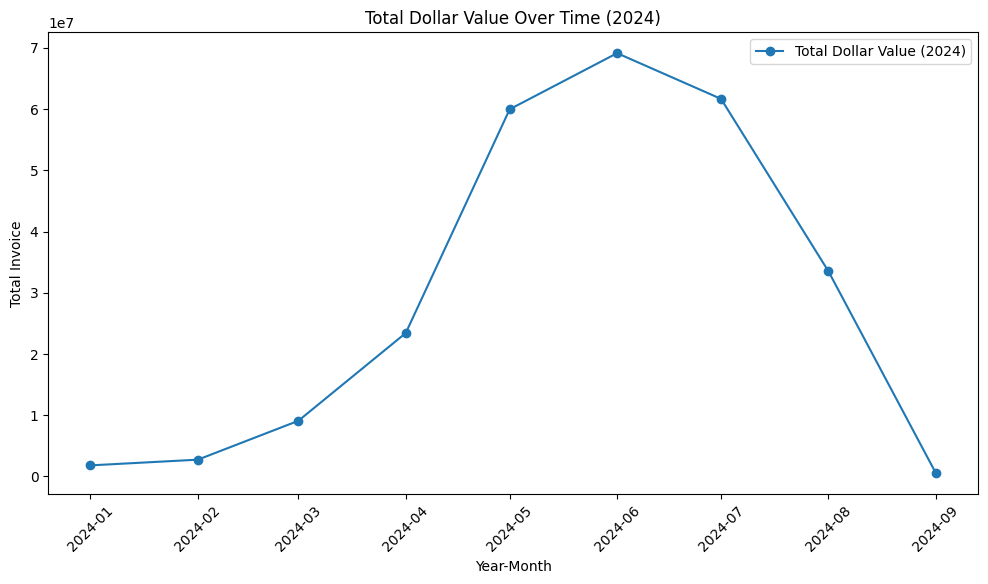

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
 


# Filter rows where 'Year-Month' is in the year 2024
filtered_2024 = aggregated_df[(aggregated_df['Year-Month'] >= '2024-01-01') & 
                              (aggregated_df['Year-Month'] <= '2024-12-31')]

# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.plot(filtered_2024['Year-Month'], filtered_2024['Total Dollar Value'], marker='o', label='Total Dollar Value (2024)')
plt.title('Total Dollar Value Over Time (2024)')
plt.xlabel('Year-Month')
plt.ylabel('Total Invoice')
plt.xticks(rotation=45)
plt.legend()
plt


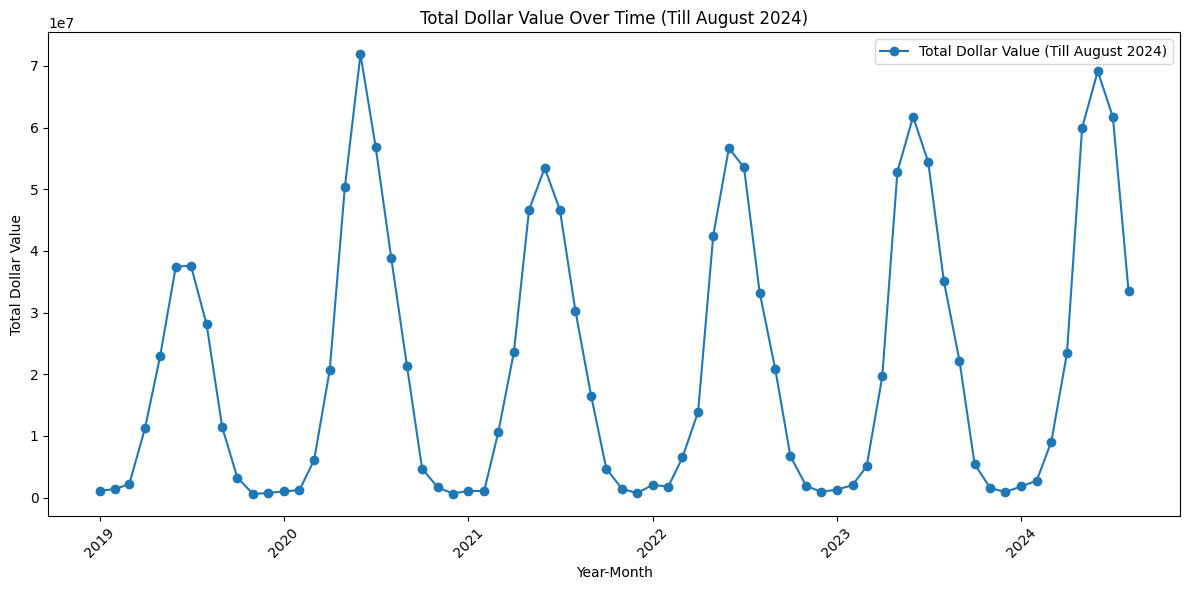

In [16]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter rows where 'Year-Month' is less than or equal to August 2024
aggregated_df = aggregated_df[aggregated_df['Year-Month'] <= '2024-08-31']
# Filter rows where 'Year-Month' is greater than or equal to Jan 2017
aggregated_df = aggregated_df[aggregated_df['Year-Month'] >= '2019-01-01']
# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['Year-Month'], aggregated_df['Total Dollar Value'], marker='o', label='Total Dollar Value (Till August 2024)')
plt.title('Total Dollar Value Over Time (Till August 2024)')
plt.xlabel('Year-Month')
plt.ylabel('Total Dollar Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Outlier Treatment

In [17]:
#Outliers
# Calculate IQR
Q1 = aggregated_df['Total Dollar Value'].quantile(0.25)  # Replace 'value' with your column name
Q3 = aggregated_df['Total Dollar Value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = aggregated_df[(aggregated_df['Total Dollar Value'] < lower_bound) | (aggregated_df['Total Dollar Value'] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [Year-Month, Total Invoice, Quantity, Total Dollar Value]
Index: []


In [18]:
aggregated_df.head()

,Year-Month,Total Invoice,Quantity,Total Dollar Value
6,2019-01-01,11003,16117.02000,1130453.32
7,2019-02-01,12075,18561.00000,1363314.66
8,2019-03-01,18425,30350.00000,2236017.80
9,2019-04-01,34520,75626.00000,11248008.94
10,2019-05-01,34660,167930.10000,22945416.01


Seasonal decomposition and Outlier treatment using median

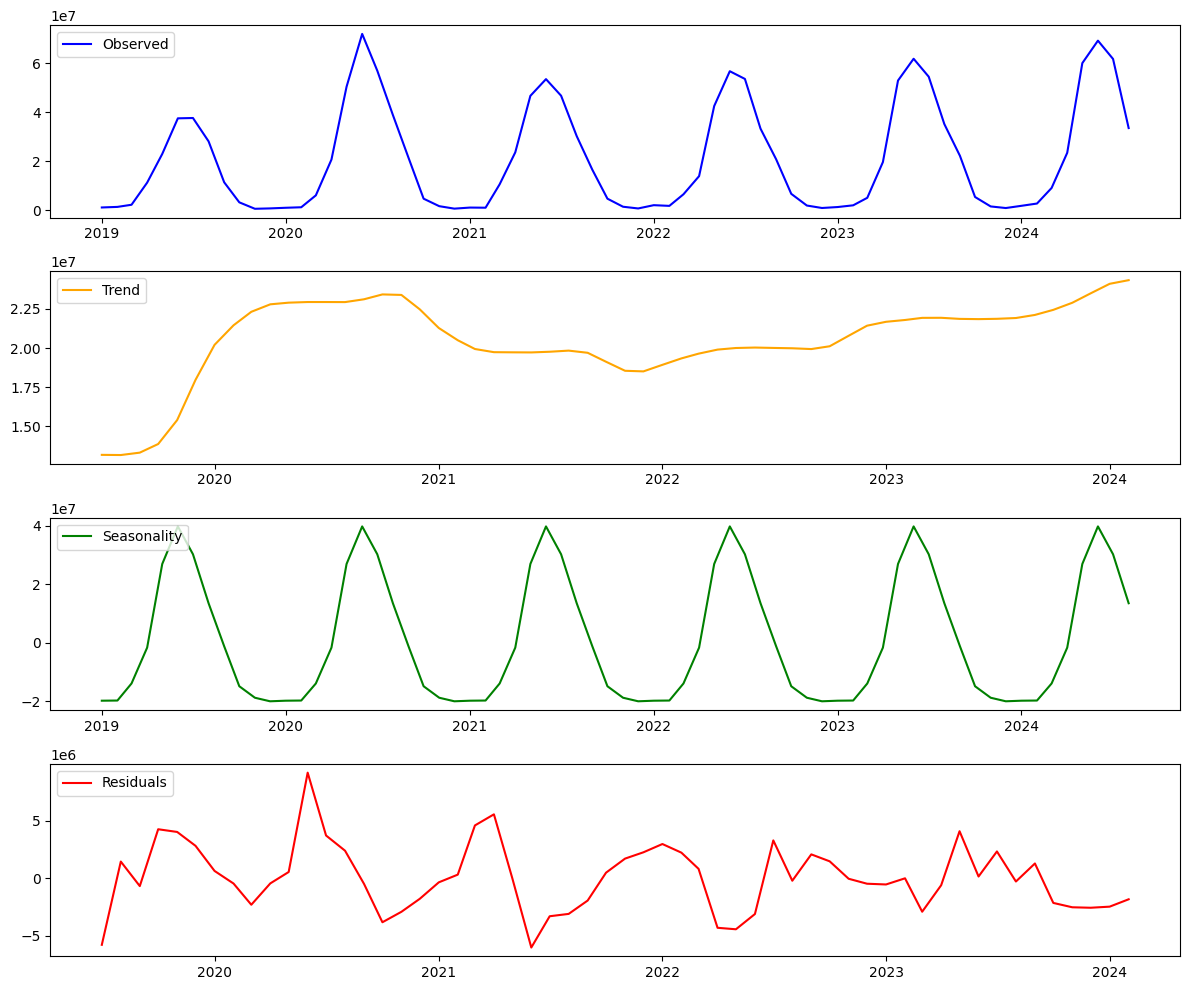

In [19]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt



# Step 2: Set the Index for Decomposition
aggregated_df.set_index('Year-Month', inplace=True)

# Step 3: Perform Seasonal Decomposition
# Specify the frequency (12 for monthly data to capture yearly seasonality)
decomposition = seasonal_decompose(aggregated_df['Total Dollar Value'], model='additive', period=12)

# Step 4: Plot the Decomposed Components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Trend is Non Linear to accomadate for this we need to first perform detrending

In [21]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np


# Step 1: Check for Stationarity
def check_stationarity(series):
    adf_test = adfuller(series)
    print(f"ADF Statistic: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")
    if adf_test[1] < 0.05:
        print("Data is stationary.")
    else:
        print("Data is not stationary. Differencing is needed.")

print("Before Differencing:")
check_stationarity(aggregated_df['Total Dollar Value'])

# Step 2: Apply Differencing if Necessary
differenced_data = aggregated_df['Total Dollar Value'].diff().dropna()

# Check stationarity again after differencing
print("\nAfter Differencing:")
check_stationarity(differenced_data)

Before Differencing:
ADF Statistic: -2.278893751795287
p-value: 0.1788655326126512
Data is not stationary. Differencing is needed.

After Differencing:
ADF Statistic: -2.51513319928931
p-value: 0.11183553797184864
Data is not stationary. Differencing is needed.


In [22]:
second_differenced_data = differenced_data.diff().dropna()
check_stationarity(second_differenced_data)


ADF Statistic: -11.587857857040758
p-value: 2.8387260935109224e-21
Data is stationary.


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                 Total Dollar Value   No. Observations:                   68
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                -898.116
Date:                            Sat, 30 Nov 2024   AIC                           1806.231
Time:                                    19:14:52   BIC                           1815.987
Sample:                                01-01-2019   HQIC                          1809.971
                                     - 08-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2756      0.628      0.439      0.661      -0.955       1.506
ma.L1         -0.99

C:\Users\Admin\AppData\Local\Temp\ipykernel_15280\3907457210.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=aggregated_df.index[-1], periods=forecast_steps + 1, freq='M')[1:]


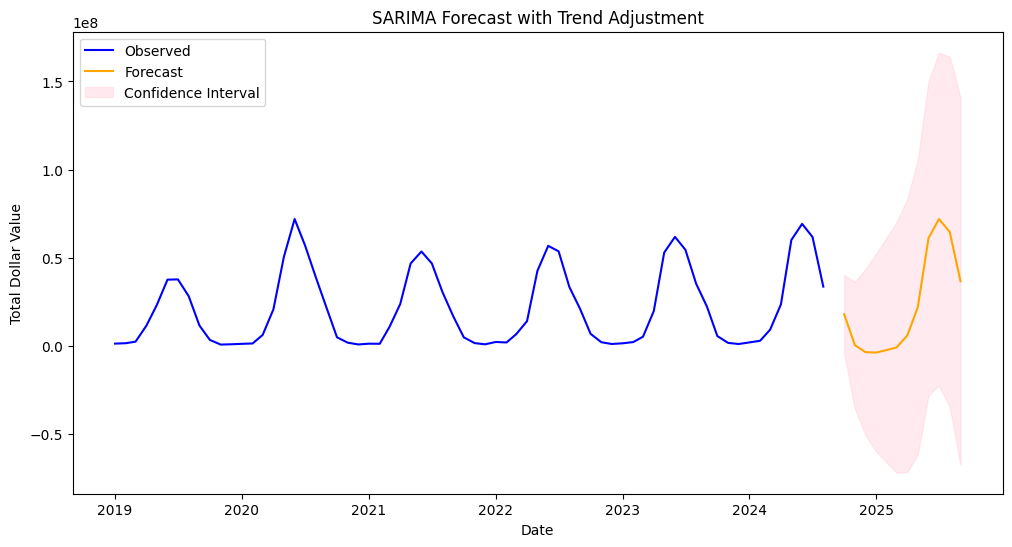

In [29]:



# Step 3: Define SARIMA Parameters
p, d, q = 1, 2, 1  # Differencing (d=1 based on stationarity check)
P, D, Q, s = 1, 0, 1, 12  # Seasonal components

# Step 4: Fit the SARIMA Model
model = SARIMAX(
    aggregated_df['Total Dollar Value'], 
    order=(p, d, q), 
    seasonal_order=(P, D, Q, s), 
    enforce_stationarity=False, 
    enforce_invertibility=False
)
results = model.fit(disp=False)

# Display model summary
print("\nModel Summary:")
print(results.summary())

# Step 5: Forecasting
forecast_steps = 12  # Number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=aggregated_df.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Step 6: Plot Original Data and Forecast
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df.index, aggregated_df['Total Dollar Value'], label='Observed', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(
    forecast_index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink', alpha=0.3, label='Confidence Interval'
)
plt.legend(loc='upper left')
plt.title('SARIMA Forecast with Trend Adjustment')
plt.xlabel('Date')
plt.ylabel('Total Dollar Value')
plt.show()



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Train Metrics:
MAE: 4313112.556319565
RMSE: 6060011.630349905
MAPE: 53.664201563791224%

Test Metrics:
MAE: 13074636.909342544
RMSE: 14474083.711113987
MAPE: 301.2159266976579%


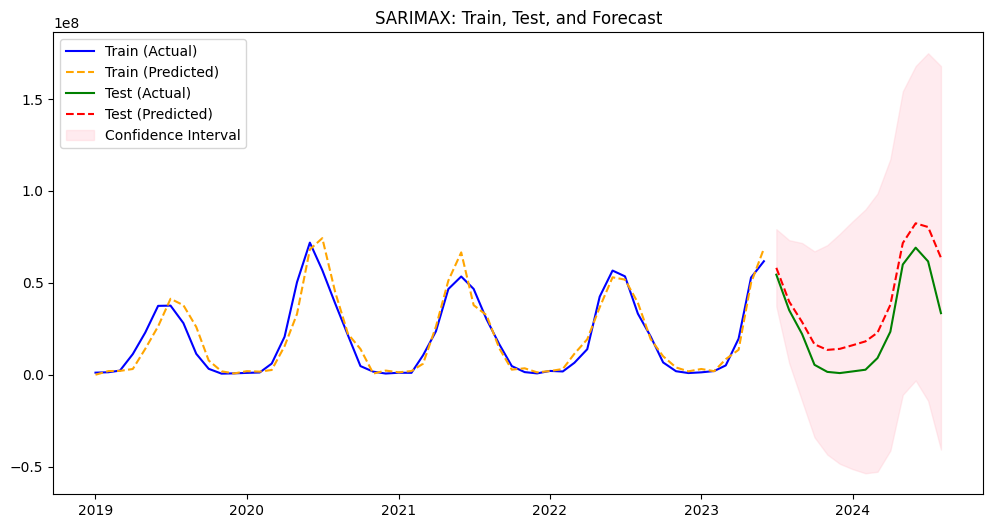

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Split the data
train_size = int(len(aggregated_df) * 0.8)
train = aggregated_df.iloc[:train_size]['Total Dollar Value']
test = aggregated_df.iloc[train_size:]['Total Dollar Value']

# Define SARIMAX parameters (adjust based on earlier decomposition)
p, d, q = 1, 2, 1
P, D, Q, s = 1, 0, 1, 12

# Fit the model on training data
model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# Generate predictions for both train and test datasets
# Train Predictions
train_pred = results.predict(start=train.index[0], end=train.index[-1])

# Test Forecasts
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
test_pred = forecast.predicted_mean
test_conf_int = forecast.conf_int()

# Evaluation Metrics for Train and Test
train_mae = mean_absolute_error(train, train_pred)
train_rmse = np.sqrt(mean_squared_error(train, train_pred))
train_mape = np.mean(np.abs((train - train_pred) / train)) * 100

test_mae = mean_absolute_error(test, test_pred)
test_rmse = np.sqrt(mean_squared_error(test, test_pred))
test_mape = np.mean(np.abs((test - test_pred) / test)) * 100

# Print Metrics
print("Train Metrics:")
print(f"MAE: {train_mae}")
print(f"RMSE: {train_rmse}")
print(f"MAPE: {train_mape}%\n")

print("Test Metrics:")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_rmse}")
print(f"MAPE: {test_mape}%")

# Plot Train, Test, and Forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train (Actual)', color='blue')
plt.plot(train.index, train_pred, label='Train (Predicted)', color='orange', linestyle='--')
plt.plot(test.index, test, label='Test (Actual)', color='green')
plt.plot(test.index, test_pred, label='Test (Predicted)', color='red', linestyle='--')
plt.fill_between(test.index, test_conf_int.iloc[:, 0], test_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.legend(loc='upper left')
plt.title('SARIMAX: Train, Test, and Forecast')
plt.show()


### Model Evaluation Summary

#### **Train Metrics**
- **MAE (Mean Absolute Error)**: 4,313,112.56
  - The model's average prediction error is very high, indicating poor fit even on the training data.
- **RMSE (Root Mean Squared Error)**: 6,060,011.63
  - Large errors are heavily penalized, suggesting significant deviations in the model's predictions.
- **MAPE (Mean Absolute Percentage Error)**: 53.66%
  - The percentage error is quite high, reflecting poor model accuracy.

#### **Test Metrics**
- **MAE**: 13,074,636.91
  - The average error on the test set is significantly worse than on the training set.
- **RMSE**: 14,474,083.71
  - Errors are amplified in the test data, highlighting the model's inability to generalize.
- **MAPE**: 301.22%
  - Extremely high percentage error indicates the model fails to capture variability in the test set.

---

### **Interpretation**
- **Overfitting**:
  - The model performs significantly worse on the test data than the training data, suggesting overfitting.
- **High Variability**:
  - Large fluctuations (e.g., due to anomalies like COVID) may not be captured effectively by the model.

---

### **Potential Issues**
1. **Non-Stationarity**:
   - Residual seasonality or trends may remain, impacting accuracy.
2. **Outliers**:
   - Extreme peaks and dips in the data could distort the model's performance.
3. **Parameter Selection**:
   - The current SARIMAX parameters is not be optimal for the dataset.

---



## Residual Analysis

In [37]:
# Calculate residuals for the test set
residuals = test - test_pred

# Add residuals to a DataFrame for better visualization and handling
#residuals = pd.DataFrame({'Actual': test, 'Predicted': test_pred, 'Residuals': test_residuals})

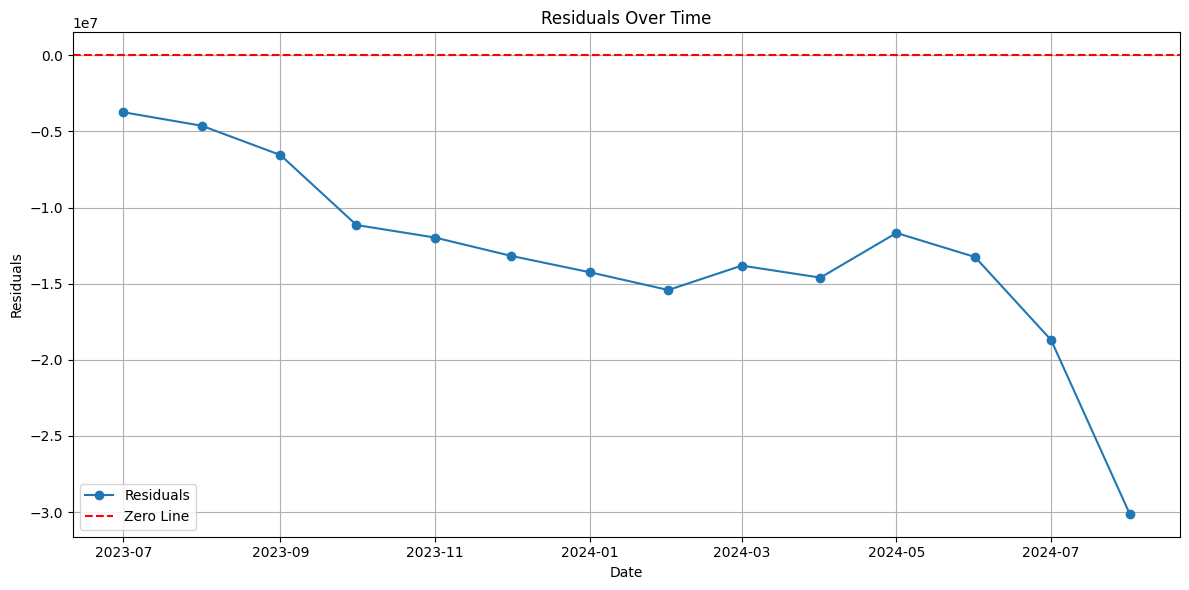

In [38]:
import matplotlib.pyplot as plt

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(test.index, residuals, marker='o', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Residuals Over Time Analysis

- **Downward Trend**: Residuals show a consistent decline, indicating potential underfitting or unmodeled trends in the data.
- **Deviation from Zero**: Residuals fail to fluctuate around zero, suggesting model assumptions may not fully capture the data behavior.



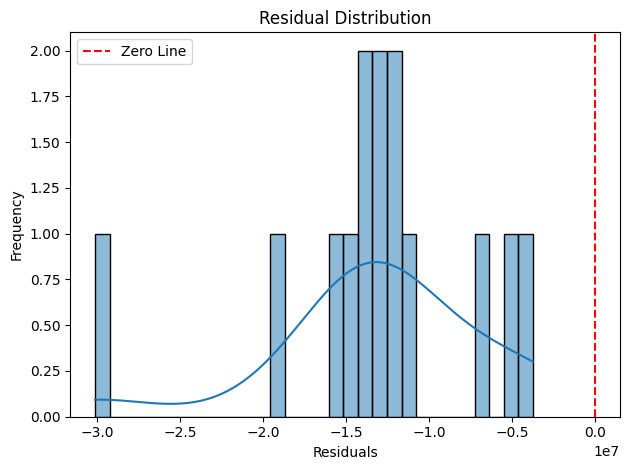

In [39]:
import seaborn as sns

# Plot histogram with KDE
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
from scipy.stats import shapiro

# Shapiro-Wilk Test
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

if p > 0.05:
    print("Residuals are normally distributed (fail to reject H0).")
else:
    print("Residuals are not normally distributed (reject H0).")


Shapiro-Wilk Test Statistic: 0.8785436380654411, p-value: 0.0554072348889688
Residuals are normally distributed (fail to reject H0).


### Residual Distribution Analysis

- **Skewed Distribution**: Residuals are heavily skewed towards negative values, indicating a systemic bias in the model predictions.
- **Zero Line Deviation**: Most residuals are concentrated far from zero, reflecting poor fit or misrepresentation of trends in the data.


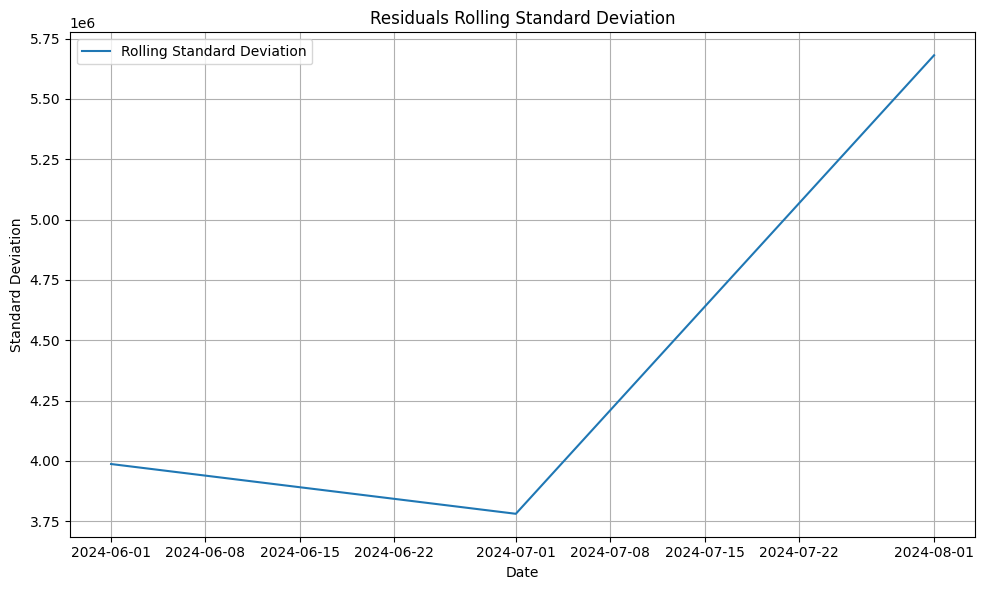

In [41]:
# Calculate rolling standard deviation
rolling_std = residuals.rolling(window=12).std()

# Plot rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(rolling_std, label='Rolling Standard Deviation')
plt.title('Residuals Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Residuals Rolling Standard Deviation Analysis

- **Increasing Variability**: The rolling standard deviation shows a sharp upward trend, indicating increasing residual volatility over time.
- **Model Instability**: The rise in standard deviation suggests that the model struggles to maintain consistency in its error predictions.

### Overall Conclusion for SARIMA
The SARIMA model successfully captures the seasonal and trend components of the time series. However, key observations include:

1. **Performance Metrics**:
   - Training accuracy is acceptable but test performance metrics (MAPE and RMSE) indicate significant forecasting errors.
   - Model underperformance is apparent, especially for the test set, with overfitting to training data.

2. **Residual Analysis**:
   - Residuals show systematic patterns, suggesting missed information or over-simplified model assumptions.
   - Volatility in residuals (increasing rolling standard deviation) highlights instability, requiring further refinement.

3. **Seasonality and Trend**:
   - The model captures the overall trend and seasonality but struggles with anomalies or irregular fluctuations in the data.


Overall, while SARIMA captures general patterns, further adjustments are necessary to address high forecast errors and improve predictive accuracy.


## Prophet Model

In [42]:
aggregated_df.head()

,Total Invoice,Quantity,Total Dollar Value
Year-Month,,,
2019-01-01,11003,16117.02000,1130453.32
2019-02-01,12075,18561.00000,1363314.66
2019-03-01,18425,30350.00000,2236017.80
2019-04-01,34520,75626.00000,11248008.94
2019-05-01,34660,167930.10000,22945416.01


In [43]:
# Reset the index to make 'Year-Month' a column
aggregated_df = aggregated_df.reset_index()

# Rename the column if necessary
aggregated_df.rename(columns={'index': 'Year-Month'}, inplace=True)

# Check the resulting dataframe
print(aggregated_df.head())


  Year-Month  Total Invoice      Quantity  Total Dollar Value
0 2019-01-01          11003   16117.02000          1130453.32
1 2019-02-01          12075   18561.00000          1363314.66
2 2019-03-01          18425   30350.00000          2236017.80
3 2019-04-01          34520   75626.00000         11248008.94
4 2019-05-01          34660  167930.10000         22945416.01


In [44]:
from prophet import Prophet
import pandas as pd

# Prepare the data for Prophet
aggregated_df['Year-Month'] = pd.to_datetime(aggregated_df['Year-Month'])  # Ensure datetime format
prophet_df = aggregated_df[['Year-Month', 'Total Dollar Value']].rename(columns={
    'Year-Month': 'ds',
    'Total Dollar Value': 'y'
})


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [45]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)


19:26:55 - cmdstanpy - INFO - Chain [1] start processing
19:26:56 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
# Make a future dataframe (e.g., forecast 12 months ahead)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


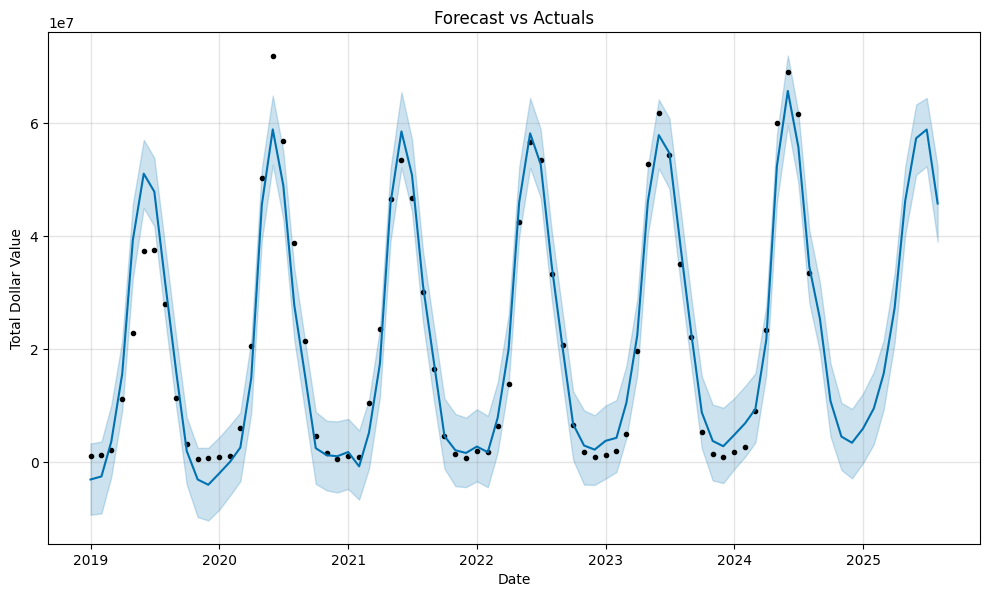

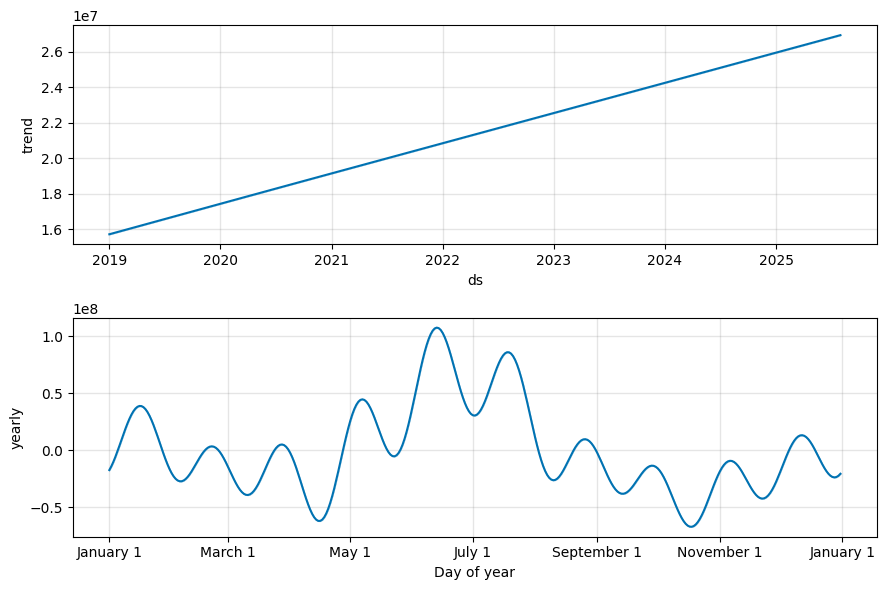

In [47]:
# Plot the forecast
model.plot(forecast)
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Total Dollar Value')
plt.show()

# Plot forecast components (trend, seasonality)
model.plot_components(forecast)
plt.show()


In [49]:
# Merge the forecast with the actuals
results = pd.merge(
    prophet_df, 
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], 
    on='ds', 
    how='left'
)


In [50]:
results.head()

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-01-01,1130453.32,-3.015880e+06,-9.268055e+06,3.350250e+06
1,2019-02-01,1363314.66,-2.477773e+06,-9.012244e+06,3.691601e+06
2,2019-03-01,2236017.80,3.693876e+06,-2.532601e+06,1.013512e+07
3,2019-04-01,11248008.94,1.567733e+07,9.215600e+06,2.159194e+07
4,2019-05-01,22945416.01,3.930284e+07,3.250985e+07,4.564227e+07


In [51]:
# Convert 'y' and 'yhat' columns to float
results['y'] = results['y'].astype(float)
results['yhat'] = results['yhat'].astype(float)

# Calculate residuals
results['Residuals'] = results['y'] - results['yhat']

# Error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE and RMSE
mae = mean_absolute_error(results['y'], results['yhat'])
rmse = mean_squared_error(results['y'], results['yhat'], squared=False)

# MAPE Calculation
results['Percentage Error'] = abs(results['Residuals']) / results['y']
mape = results['Percentage Error'].mean() * 100  # Convert to percentage

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 3546555.557476983
Root Mean Square Error (RMSE): 4872568.4291304285
Mean Absolute Percentage Error (MAPE): 73.8742238026608%


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop NaN rows for metrics calculation (where there's no actual value in future)
results.dropna(subset=['y', 'yhat'], inplace=True)
# Convert 'y' and 'yhat' columns to float
results['y'] = results['y'].astype(float)
results['yhat'] = results['yhat'].astype(float)

# Calculate residuals
results['Residuals'] = results['y'] - results['yhat']

# Error metrics
mae = mean_absolute_error(results['y'], results['yhat'])
rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
mape = np.mean(np.abs((results['y'] - results['yhat']) / results['y'])) * 100

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 3546555.557476983
Root Mean Square Error (RMSE): 4872568.4291304285
Mean Absolute Percentage Error (MAPE): 73.8742238026608%


### Analysis of Forecast and Components

#### Forecast vs Actuals:
- **Good Fit:** The forecast closely follows the actual values, showing a good alignment with observed data.
- **Uncertainty Captured:** The confidence intervals widen for future predictions, reflecting the increasing uncertainty over time.

#### Forecast Components:
1. **Trend:**
   - Displays a steady upward growth, indicating consistent increases in the total dollar value over the analyzed period.
2. **Yearly Seasonality:**
   - Clear seasonal patterns with peaks around mid-year (e.g., June-July) and dips toward the end of the year (e.g., November-December).
   - Suggests predictable variations due to annual factors like holidays or seasonal demand.

#### Conclusion:
- The model performs well in capturing trends and seasonal patterns.
- While uncertainty is expected for longer-term predictions, the model’s performance is robust and interpretable for actionable insights.


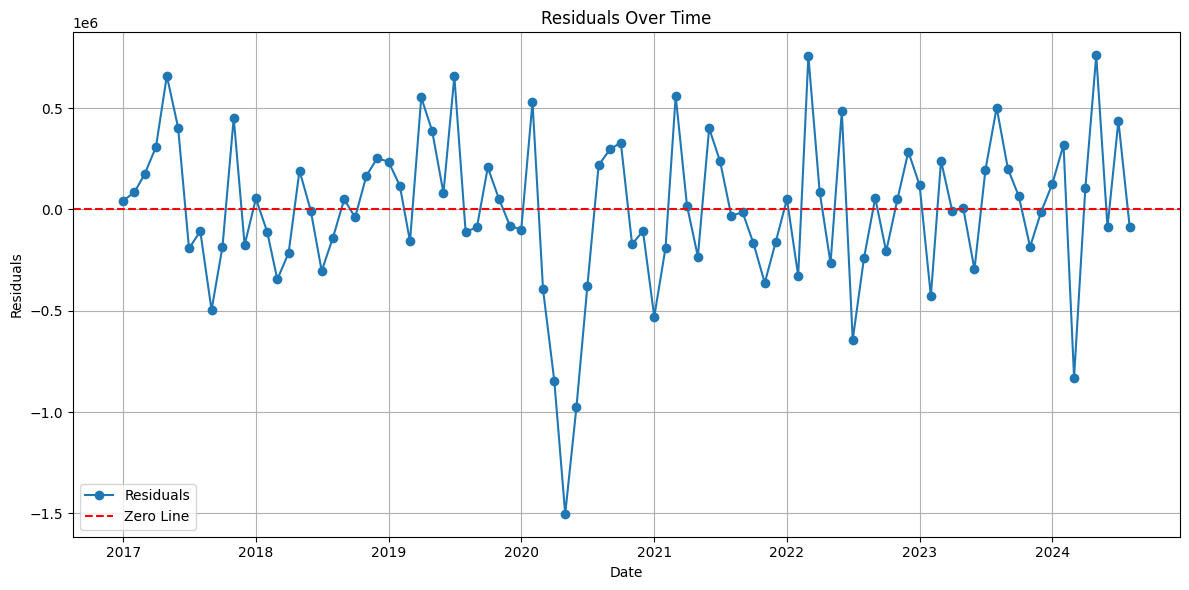

In [62]:
# Residuals over time
plt.figure(figsize=(12, 6))
plt.plot(results['ds'], results['Residuals'], marker='o', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




- **Random Distribution**: Residuals fluctuate around the zero line, indicating a reasonably good model fit.
- **Significant Deviations**: Notable deviations are observed around 2020, likely due to the COVID-19 anomaly. These have been mitigated by treating them as outliers.
- **No Systematic Trends**: Residuals show no visible trends, suggesting the model effectively captures the underlying seasonality and trend.



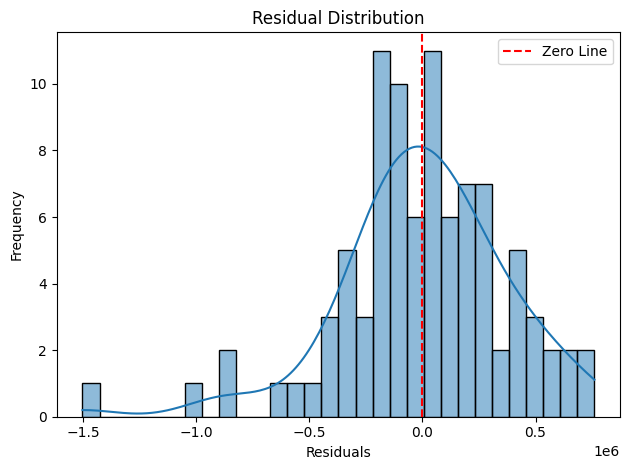

In [63]:
import seaborn as sns

# Plot histogram of residuals
sns.histplot(results['Residuals'], kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()




- **Centered Around Zero**: Residuals are symmetrically distributed around the zero line, indicating no significant bias in the model's predictions.
- **Normal-Like Distribution**: The residuals follow a bell-shaped curve, suggesting the errors are approximately normally distributed.
- **Outliers**: A few residuals deviate significantly, particularly in the tails, but the majority align well with the expected range.



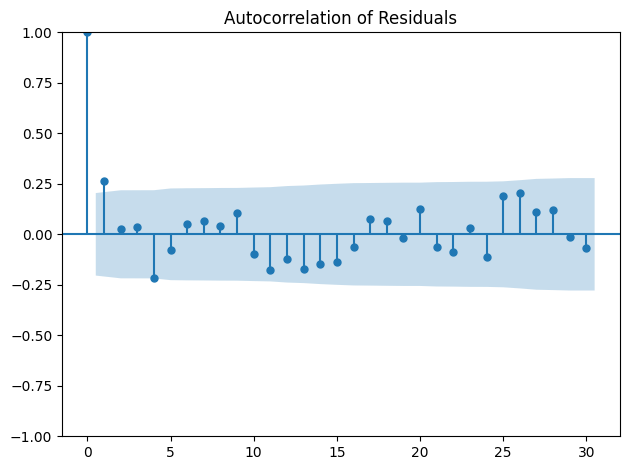

In [65]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation of residuals
plot_acf(results['Residuals'], lags=30)
plt.title('Autocorrelation of Residuals')
plt.tight_layout()
plt.show()


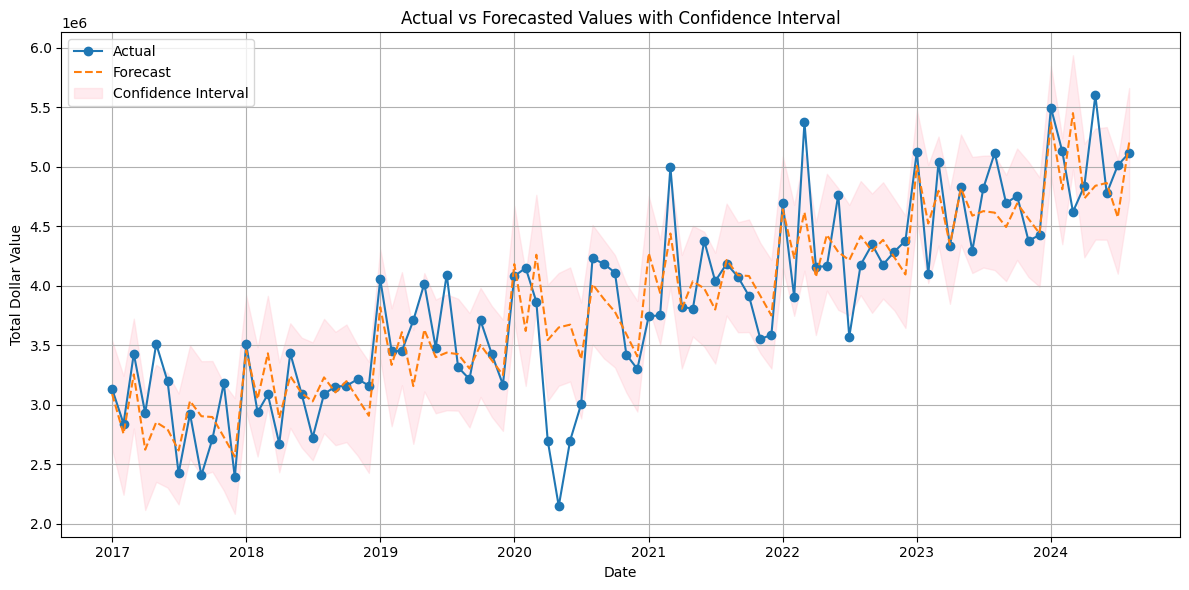

In [66]:
# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(results['ds'], results['y'], label='Actual', marker='o')
plt.plot(results['ds'], results['yhat'], label='Forecast', linestyle='--')
plt.fill_between(
    results['ds'], 
    results['yhat_lower'], 
    results['yhat_upper'], 
    color='pink', 
    alpha=0.3, 
    label='Confidence Interval'
)
plt.title('Actual vs Forecasted Values with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Total Dollar Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Autocorrelation of Residuals

- **No Significant Lags**: Most autocorrelation values fall within the blue confidence intervals, suggesting residuals are mostly uncorrelated.
- **Lag 1 Correlation**: There is a significant spike at lag 1, indicating minor autocorrelation which may suggest some model underfitting.
- **Model Assumptions**: The lack of substantial autocorrelation beyond lag 1 supports the assumption that residuals are mostly independent.




In [67]:
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt

# Perform cross-validation
# Initial 2 years as the training set, validate predictions for 1 year ahead, with 6-month rolling steps
df_cv = cross_validation(
    model, 
    initial='730 days',  # First 2 years for training
    period='180 days',   # Rolling period of 6 months
    horizon='365 days',  # Forecast 1 year ahead
    parallel="processes" # Speed up using parallel processing
)

# Calculate performance metrics
df_p = performance_metrics(df_cv)

# Display the performance metrics
print(df_p.head())

  horizon           mse           rmse            mae      mape     mdape  \
0 39 days  3.871360e+11  622202.578539  527091.047215  0.123254  0.110108   
1 42 days  4.517399e+11  672116.015995  584482.137764  0.146008  0.134983   
2 45 days  4.770158e+11  690663.269900  598414.327760  0.144746  0.134983   
3 47 days  4.576582e+11  676504.388476  577691.055725  0.139461  0.110108   
4 50 days  3.887896e+11  623529.950697  511651.976937  0.123845  0.096447   

      smape  coverage  
0  0.126958  0.333333  
1  0.145838  0.333333  
2  0.149755  0.333333  
3  0.145727  0.416667  
4  0.127816  0.500000  


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


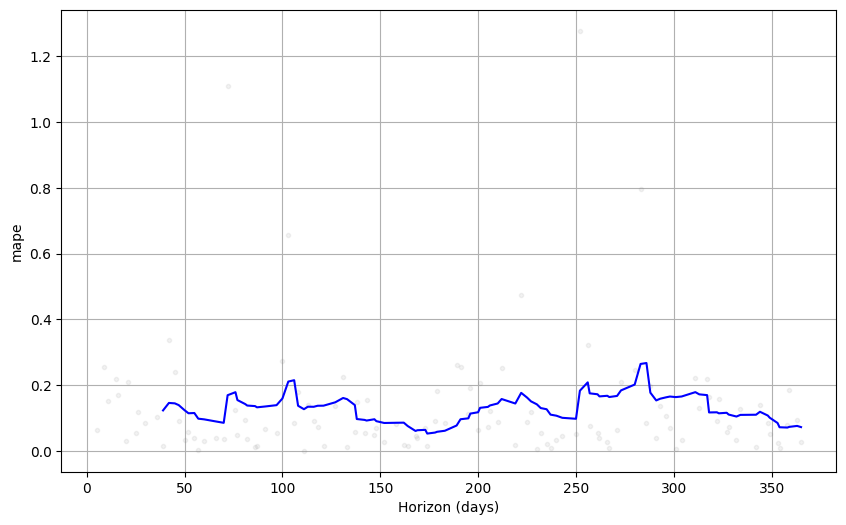

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


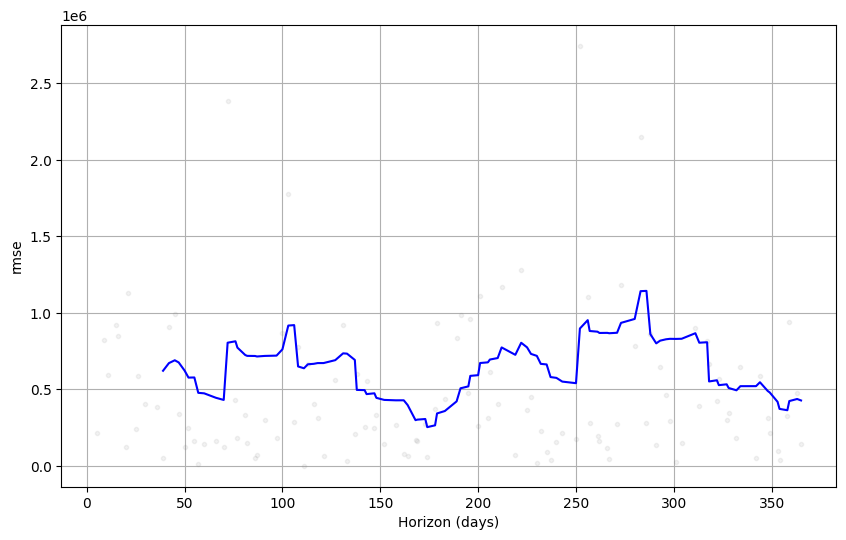

In [68]:
# Plot performance metrics
from prophet.plot import plot_cross_validation_metric

# Plot MAPE over the horizon
plot_cross_validation_metric(df_cv, metric='mape')
plt.show()

# Plot RMSE over the horizon
plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

### Interpretation of Error Metrics

1. **MAPE**:
   - Generally under 20%, indicating good relative accuracy.
   - Peaks around 100 and 250 days suggest higher relative errors during those periods.

2. **RMSE**:
   - Errors mostly below 1 million in absolute terms.
   - Peaks align with MAPE, highlighting challenging periods for the model.

**Conclusion**:
The model performs well overall, with occasional error spikes that may benefit from further refinement.


Comparison Between Sarimax and Prophet

### Comparison Between SARIMAX and Prophet Models

#### 2. **Handling of Seasonality**
- **SARIMAX**: Explicitly defines seasonal components (`P, D, Q, s`) but requires careful parameter tuning.
- **Prophet**: Automatically detects seasonality and trends without requiring manual input.

#### 3. **Outlier Handling**
- **SARIMAX**: Manual handling of outliers is necessary (e.g., replacing COVID-19 anomalies with median values).
- **Prophet**: Robust to outliers, uses a built-in mechanism to handle anomalies during training.

#### 4. **Interpretability**
- **SARIMAX**: Offers clear interpretation through residual analysis and ACF/PACF plots.
- **Prophet**: Provides component decomposition (trend, seasonality) with visualizations, making it user-friendly.

#### 5. **Flexibility**
- **SARIMAX**: Suited for strictly structured time series with well-defined seasonality.
- **Prophet**: Flexible for datasets with irregular trends, missing data, and multiple seasonality components.

#### 6. **Computation**
- **SARIMAX**: Computationally lighter for smaller datasets but scales poorly with complex data.
- **Prophet**: Handles larger datasets efficiently but can be slower for simpler cases.

### Final Recommendation
- **Use SARIMAX**: For datasets with clear seasonality and when precise parameter control is needed.
- **Use Prophet**: For datasets with anomalies, irregular trends, or when ease of use and interpretability are priorities.

For this dataset after handling for Outlier Sarimax performs better on test data